## Project 2 : Investigate Dataset(Titanic)



<div style="text-align: right"> Xiaosong Zhang December 17$^{th}$ 2016 </div>

## 0.Introduction

In the second project of Data Analyst Nanodegree, I would like to  Investigate the Titanic dataset use Python and it's data analysis/visualization related packages.

Titanic's tragic maiden voyage is long being a famous shipwreck story in the history of sea transportation. The unsinkable myth -- exaggerated from it's advanced multiple watertight compartments design, gave extraordinary confidence to her designer and also her crew team. The decision to reduce the amount of lifeboat since they think it will never be needed proved to one of the most expensive mistakes ever made in the history of the cruise industry. 

In this project, I would like to take a close look to the dataset of Titanic's passenger data, and I will try to get some numerical summary, meaningful visualization.

First, let's get take a look at the descriptions of this dataset(From Kaggle):
```
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

```

Since this dataset provides so many information about the passengers, that I think there are lots of hypotheses that we can establish and exam.
The most important variable for me is the *Survived*, which I think I will let it be my 
response variable and I will try to exam the relationship between *Survived* with other independent variables.

There are many questions I am bearing in my mind such as:
* People at what age range are most likely to survive?
* People in which Pclass(class of stateroom)are most likely to survive?
* Is there any difference of survivability between genders?
* ...

## 1. Data Import and  Wrangling


Before we start dive into the data, lets import some of the tools we might need in the data import and wrangling stage. I choose to use pandas, numpy and scipy to import, manipulation and calculation for the dataset. The visualization will be rely on matplotlib package.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as ss
%matplotlib inline

Let's import the [titanic-data.csv](https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv) use the **Pandas read_csv** function, the dataset was retrieve from Udacity's P2 project preparation page.


In [2]:
data = pd.read_csv('titanic-data.csv')
data = data.set_index('PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Get information about the DataFrame by Using .info() function
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


From the result of the `.info()` function, we can observe how the data are stored in the DataFrame, as well as which variables are having missing values. We have total of 891 rows of data entries, we have complete information in most fields but `Age, Embarked and Cabin` field. In the `Cabin` field we only have `204/891` non-null values. Besides the missing values within this dataset, we should also be aware that the [**Total number of people on board**](https://www.encyclopedia-titanica.org/titanic-passenger-list/) is **2224(1316 Passengers and 908 Crew)**. Thus, this dataset is not complete and the sampling method is unkown, which could be a concern if we want to generalize our findings to represent the entire population.

In [4]:
# Create Survival Label Column
data['Survival'] = data.Survived.map({0 : 'Died', 1 : 'Survived'})
data.Survival.head()
# Create Pclass Label Column
data['Class'] = data.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})
data.Class.head()
# Create Embarked Labels Column
data['Ports'] = data.Embarked.map({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'})

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival,Class,Ports
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Died,Third Class,Southampton
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,First Class,Cherbourg
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Third Class,Southampton
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,First Class,Southampton
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Died,Third Class,Southampton


In [6]:
#describe the dataset by give out the numerical summaries for each field.
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the simple numerical summary results above, we already could gather a lot of information. There are only about 38.4% of people in our dataset survived from this tragedy, and the average Age is less than 30 years old, there are large families with as much as 8 siblings, but most of the travelers are travel along(`mean = 0.52`)

To further investigate this dataset and try to find the answer to my questions, I will try to divide this dataset into different groups by variable we interested in and make some summarization and visualization.


## 2 Data Exploration and Visualization



### a.People in which Pclass(class of stateroom)are most likely to survive?
First, I want to look into the data by divide it by the different class of stateroom. I use the `.describe() function` and `.groupby() function` came with the `Pandas package` to get a numerical summary.  

In [7]:
data.groupby('Pclass').describe()

Age        Fare       Parch       SibSp    Survived
Pclass                                                                  
1      count  186.000000  216.000000  216.000000  216.000000  216.000000
       mean    38.233441   84.154687    0.356481    0.416667    0.629630
       std     14.802856   78.380373    0.693997    0.611898    0.484026
       min      0.920000    0.000000    0.000000    0.000000    0.000000
       25%     27.000000   30.923950    0.000000    0.000000    0.000000
       50%     37.000000   60.287500    0.000000    0.000000    1.000000
       75%     49.000000   93.500000    0.000000    1.000000    1.000000
       max     80.000000  512.329200    4.000000    3.000000    1.000000
2      count  173.000000  184.000000  184.000000  184.000000  184.000000
       mean    29.877630   20.662183    0.380435    0.402174    0.472826
       std     14.001077   13.417399    0.690963    0.601633    0.500623
       min      0.670000    0.000000    0.000000    0.000000    0.000000
       25%     23.000000   13.000000    0.000000    0.000000    0.000000
       50%     29.000000   14.250000    0.000000    0.000000    0.000000
       75%     36.000000   26.000000    1.000000    1.000000    1.000000
       max     70.000000   73.500000    3.000000    3.000000    1.000000
3      count  355.000000  491.000000  491.000000  491.000000  491.000000
       mean    25.140620   13.675550    0.393075    0.615071    0.242363
       std     12.495398   11.778142    0.888861    1.374883    0.428949
       min      0.420000    0.000000    0.000000    0.000000    0.000000
       25%     18.000000    7.750000    0.000000    0.000000    0.000000
       50%     24.000000    8.050000    0.000000    0.000000    0.000000
       75%     32.000000   15.500000    0.000000    1.000000    0.000000
       max     74.000000   69.550000    6.000000    8.000000    1.000000

From the data description, the 1 in the Pclass stands for $1^{st}$Class, which is the most luxary and expensive one and 3 stands for $3^{rd}$ Class which is cheapest stateroom. Usually, the $1^{st}$Class and $2^{nd}$ Class staterooms are on upper decks and have sea views while the $3r$Class stateroom are located on lower decks.

In the table about, we can observe that the percentage of survived is:
* $1^{st}$ Class $62.9\%$
* $2^{nd}$ Class $47.2\%$
* $3^{rd}$ Class $24.2\%$

At the same time we can also observe that the average age for different classes are also divided:

* $1^{st}$ Class $38.2$
* $2^{nd}$ Class $29.9$
* $3^{rd}$ Class $25.1$

It seems that the people who can afford the expensive tickets of the $1^{st}$ Class staterooms are generally older.

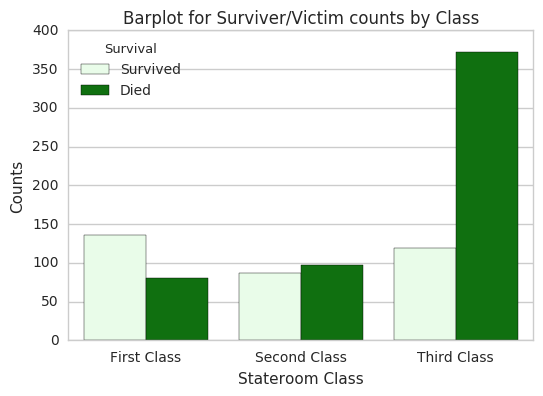

In [8]:
##describe the dataset by give out the visualized summaries for each field group by survivors and victims.
SurviveByClass = sns.countplot(x="Class", hue="Survival", color ='Green',data=data.sort_values(by="Pclass"))
SurviveByClass.set_title('Barplot for Surviver/Victim counts by Class')
SurviveByClass.set(xlabel='Stateroom Class', ylabel='Counts')

In [9]:

# Table of survival vs passenger class
survived_class = pd.crosstab(index=data["Survived"], 
                            columns=data["Pclass"])

survived_class.columns = ["class1","class2","class3"]
survived_class.index= ["died","survived"]

survived_class

,class1,class2,class3
died,80,97,372
survived,136,87,119


In [10]:
#ss.stats.chisquare( survived_class,axis =0)

Compare to the messy table of the numerical summary, I think the barplot by stateroom class give a intuitive answer for the question and much easier to read and understand.

### b.Is there any difference of survivability between genders?



In [11]:
#describe the dataset by give out the numerical summaries for each field group by survivors and victims.
data.groupby('Sex').describe()

Age        Fare       Parch      Pclass       SibSp  \
Sex                                                                        
female count  261.000000  314.000000  314.000000  314.000000  314.000000   
       mean    27.915709   44.479818    0.649682    2.159236    0.694268   
       std     14.110146   57.997698    1.022846    0.857290    1.156520   
       min      0.750000    6.750000    0.000000    1.000000    0.000000   
       25%     18.000000   12.071875    0.000000    1.000000    0.000000   
       50%     27.000000   23.000000    0.000000    2.000000    0.000000   
       75%     37.000000   55.000000    1.000000    3.000000    1.000000   
       max     63.000000  512.329200    6.000000    3.000000    8.000000   
male   count  453.000000  577.000000  577.000000  577.000000  577.000000   
       mean    30.726645   25.523893    0.235702    2.389948    0.429809   
       std     14.678201   43.138263    0.612294    0.813580    1.061811   
       min      0.420000    0.000000    0.000000    1.000000    0.000000   
       25%     21.000000    7.895800    0.000000    2.000000    0.000000   
       50%     29.000000   10.500000    0.000000    3.000000    0.000000   
       75%     39.000000   26.550000    0.000000    3.000000    0.000000   
       max     80.000000  512.329200    5.000000    3.000000    8.000000   

                Survived  
Sex                       
female count  314.000000  
       mean     0.742038  
       std      0.438211  
       min      0.000000  
       25%      0.000000  
       50%      1.000000  
       75%      1.000000  
       max      1.000000  
male   count  577.000000  
       mean     0.188908  
       std      0.391775  
       min      0.000000  
       25%      0.000000  
       50%      0.000000  
       75%      0.000000  
       max      1.000000

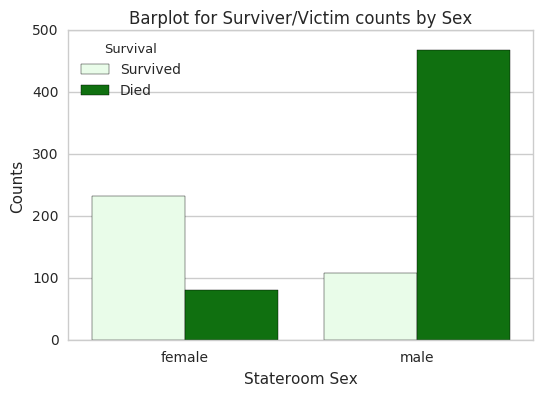

In [12]:
##describe the dataset by give out the visualized summaries for each field group by survivors and victims.
SurviveBySex = sns.countplot(x="Sex", hue="Survival", color ='Green',data=data.sort_values(by="Sex"))
SurviveBySex.set_title('Barplot for Surviver/Victim counts by Sex')
SurviveBySex.set(xlabel='Stateroom Sex', ylabel='Counts')

In [13]:
# Table of survival vs passenger sex
survived_sex = pd.crosstab(index=data["Survived"], 
                            columns=data["Sex"])

survived_sex.columns = ['Female',"Male"]
survived_sex.index= ["died","survived"]

survived_sex



,Female,Male
died,81,468
survived,233,109


In [14]:
#ss.stats.chisquare(survived_sex)

From the numerical summary and the barplot grouped by gender, we can clearly observe the huge difference of possiblity to survive in this accident. It's not very hard to tell that female have much higher chance to survive compares to male. The Chi-Square test result confirm what we saw in the barplot.

### c.People at what age range are most likely to survive?

For this question, it's hard to devide the data by Age since there are will be too many sub tables if we do the similar groupby summary as previous questions. It took me a long time to research and try different approaches to visualize the difference due to age, and I found this `FacetGrid ` and `kdeplot functions` in `Seaborn Package`from one of kaggle repository (https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic)seems elegently did the job.

From the plot below, we can observe that passengers younger than 13 years old have significantly higher chance to survive and passengers older than 60 years old have lower chance to survive. There are also some differences in 13 to 30 and 30 to 40 years old interval too, but not as significant as the difference in previous groups.

In [15]:
#describe the dataset by give out the numerical summaries for each field group by survivors and victims.
data.groupby('Survived').describe()

Age        Fare       Parch      Pclass       SibSp
Survived                                                                  
0        count  424.000000  549.000000  549.000000  549.000000  549.000000
         mean    30.626179   22.117887    0.329690    2.531876    0.553734
         std     14.172110   31.388207    0.823166    0.735805    1.288399
         min      1.000000    0.000000    0.000000    1.000000    0.000000
         25%     21.000000    7.854200    0.000000    2.000000    0.000000
         50%     28.000000   10.500000    0.000000    3.000000    0.000000
         75%     39.000000   26.000000    0.000000    3.000000    1.000000
         max     74.000000  263.000000    6.000000    3.000000    8.000000
1        count  290.000000  342.000000  342.000000  342.000000  342.000000
         mean    28.343690   48.395408    0.464912    1.950292    0.473684
         std     14.950952   66.596998    0.771712    0.863321    0.708688
         min      0.420000    0.000000    0.000000    1.000000    0.000000
         25%     19.000000   12.475000    0.000000    1.000000    0.000000
         50%     28.000000   26.000000    0.000000    2.000000    0.000000
         75%     36.000000   57.000000    1.000000    3.000000    1.000000
         max     80.000000  512.329200    5.000000    3.000000    4.000000

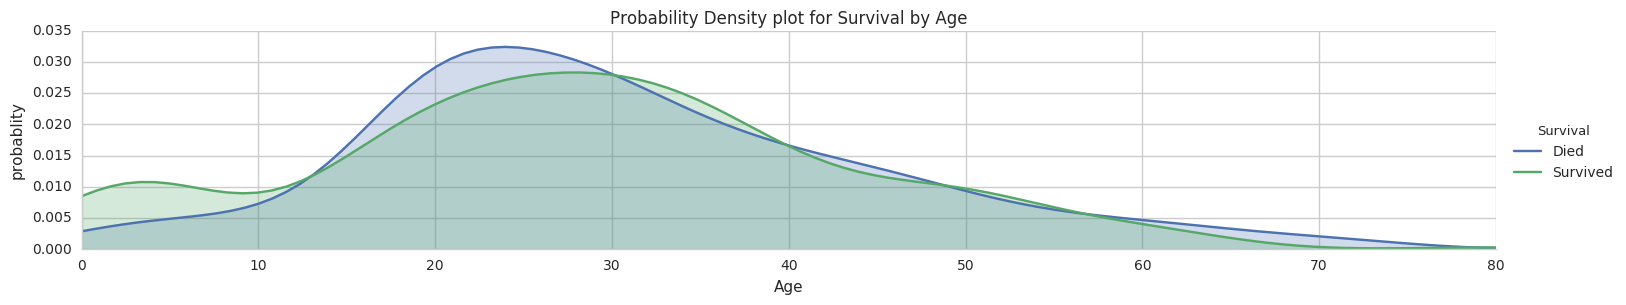

In [16]:

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(data, hue="Survival",aspect=5)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, data['Age'].max()),title = 'Probability Density plot for Survival by Age',ylabel= 'probablity')
facet.add_legend()

## Conclusion

* People at what age range are most likely to survive?

Infants are more likely to survive may be due to they recive more protection during the evacuation as well as they have highest proiority when boarding to lifeboat. 
The extremely cold weather when the accident happened might be one of the reasons that older passenger's survival chance suffers. 

* People in which Pclass(class of stateroom)are most likely to survive?

Passengers in $1^{st}$ class has the highest chance to survive, this might be caused by the location of their stateroom. Better and more expensive staterooms tend to be on the upper deck and located closer to the lifeboat. 
* Is there any difference in survivability between genders?

There is a significant difference of surviving chance between male and female, the likelihood of surviving is more than tripled for female passengers compares to male passengers.


In general, even trapped in the life-threatening disaster on a sinking ship in the middle of no-where, the passengers on Titanic still follow the "children and lady first" code of ethics. I admire such a great spiritual power that can overcome the natural survival instinct and choose to do the "Right thing". I think this level of self-discipline is one of the most important reasons that we are different that other creatures and built such a civilized society today.


## Reference

Kaggle  [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

Omar El Gabry [A Journey through Titanic](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic)

Megan Risdal [Exploring the Titanic Dataset](https://www.kaggle.com/mrisdal/titanic/exploring-survival-on-the-titanic)

Wikipedia [RMS Titanic](https://en.wikipedia.org/wiki/RMS_Titanic)

[Encyclopedia Titanica](https://www.encyclopedia-titanica.org)
